## **ENTRI SOFTWARE PVT LIMITED CUSTOMER ANALYSIS**



Analysis of ENTRI SOFTWARE PVT LIMITED Clientele Overview aims to categorize customers according to their propensity to accept campaigns by analyzing their behavior. The company also tries to segment its customers for more focused marketing campaigns. The analysis will be carried out with historical information about the customer.


#### Project Goal:

1. Explore customer transaction data and find interesting insights to purchase behavior
2. 
Identify customer segments that contribute to sales3. 1.Using historical data, create a model that focuses on each stage of the data science process: evaluation, modeling, data processing, EDA, and visualizatio
4. . Draw attention to patterns, in-depth understandings, and creative strategies used in the analysis. Utilize machine learning techniques for clustering and classification, then assess the resul.ls

### What's in this notebook:

-  Data Loading and Cleaning
-  Handling null values
-  Remove unwanted columns
-  Data processing
-  Remove Outliers
-  Exploratory Data Analysis
-  Feature engineering
-  Label Encoding
-  Visualization
-  Feature Scaling And Dimensionality Reduction
-  Data Analysis
-  Training and Testing
-  Summary of Model Performance
-  Conclusion

#### About datast:

This dataset includes data from the company's recent two years' sales, products, campaigns, and personal customer information.

#### People:

-  ID: Customer's unique identifier
-  Year_Birth: Customer's birth year
-  Education: Customer's education level
-  Marital_Status: Customer's marital status
-  Income: Customer's yearly household income
-  Kidhome: Number of children in customer's household
-  Teenhome: Number of teenagers in customer's household
-  Dt_Customer: Date of customer's enrollment with the company
-  Recency: Number of days since customer's last purchase
-  Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products:

-  MntWines: Amount spent on wine in last 2 years
-  MntFruits: Amount spent on fruits in last 2 years
-  MntMeatProducts: Amount spent on meat in last 2 years
-  MntFishProducts: Amount spent on fish in last 2 years
-  MntSweetProducts: Amount spent on sweets in last 2 years
-  MntGoldProds: Amount spent on gold in last 2 years

#### Promotion:

-  NumDealsPurchases: Number of purchases made with a discount
-  AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
-  AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
-  AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
-  AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
-  AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
-  Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place:

-  NumWebPurchases: Number of purchases made through the company’s website
-  NumCatalogPurchases: Number of purchases made using a catalogue
-  NumStorePurchases: Number of purchases made directly in stores
-  NumWebVisitsMonth: Number of visits to company’s website in the last month

### Importng Python Libraries Used in this Project

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

### Loading the Dataset

In [7]:
data = pd.read_csv("Downloads/customer_train.csv")
data.shape         

(1680, 31)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1680 non-null   int64  
 1   Unnamed: 0           1680 non-null   int64  
 2   ID                   1680 non-null   int64  
 3   Year_Birth           1680 non-null   int64  
 4   Education            1680 non-null   object 
 5   Marital_Status       1680 non-null   object 
 6   Income               1663 non-null   float64
 7   Kidhome              1680 non-null   int64  
 8   Teenhome             1680 non-null   int64  
 9   Dt_Customer          1680 non-null   object 
 10  Recency              1680 non-null   int64  
 11  MntCoke              1680 non-null   int64  
 12  MntFruits            1680 non-null   int64  
 13  MntMeatProducts      1680 non-null   int64  
 14  MntFishProducts      1680 non-null   int64  
 15  MntSweetProducts     1680 non-null   i

There are 1680 raws in the dataset, with 25 columns. It includes three different kinds of data: float, object, and integer. In some of the columns, there are null values. It has three object dtype, twentyfive int64 dtype, and one float64 dtype.. There is unwanted columns and we need to remove that.

In [9]:
def delete_column(df, column_name):
    if column_name in df.columns:
        del df[column_name]
        return df
    else:
        print(f"Column '{column_name}' not found in DataFrame.")
        return df
# Deleting column 'Unnamed'
data = delete_column(data, 'Unnamed: 0')
data = delete_column(data, 'Unnamed: 0.1')

print(data)

        ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0     5524        1957        S1         Lajang  58138000.0        0   
1     2174        1954        S1         Lajang  46344000.0        1   
2     4141        1965        S1    Bertunangan  71613000.0        0   
3     6182        1984        S1    Bertunangan  26646000.0        1   
4     5324        1981        S3        Menikah  58293000.0        1   
...    ...         ...       ...            ...         ...      ...   
1675  4712        1991        D3    Bertunangan  20193000.0        0   
1676  1170        1975        S1        Menikah  27573000.0        1   
1677  6347        1979       SMA         Lajang  15862000.0        1   
1678  4065        1976        S3        Menikah  49544000.0        1   
1679  8230        1980        S1        Menikah  33228000.0        1   

      Teenhome Dt_Customer  Recency  MntCoke  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58   635000  ...              

In [10]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,5,0,0,0,0,0,0,3,11,0


##### Checking the data for possible null values

In [11]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

We can find that there is 17 null raws in the column 'Income'.  Hence, required to handle the null values accordingly

In [12]:
# filling the null values with the mean.
data['Income'].fillna(data['Income'].mean(skipna=True), inplace=True)
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

##### The null values in the 'income' column are replaced with mean.

### Removing duplicates

In [13]:
data.drop_duplicates(inplace=True)

### Outlier
##### Age

The birth year should be converted to Age for computational convenience. Consequently, we eliminate the "Year_Birth" column and add a new one named "Age".

In [14]:
import datetime

current_year = datetime.datetime.now().year
data['Age'] = current_year - data['Year_Birth']
data.drop('Year_Birth', axis=1, inplace=True)
data['Age'].value_counts()

Age
48     66
52     65
54     62
49     61
46     61
59     60
53     60
51     58
55     53
50     49
66     45
64     42
72     41
68     40
47     38
45     38
65     38
58     37
70     36
56     35
57     35
62     34
61     34
42     33
69     33
38     33
71     31
63     30
60     30
41     29
67     28
43     28
44     28
35     27
73     26
36     26
39     24
37     22
40     21
74     20
75     18
76     18
78     13
33     12
34     11
32      9
77      8
80      7
79      6
81      5
31      4
30      3
29      3
28      2
125     1
131     1
83      1
124     1
Name: count, dtype: int64

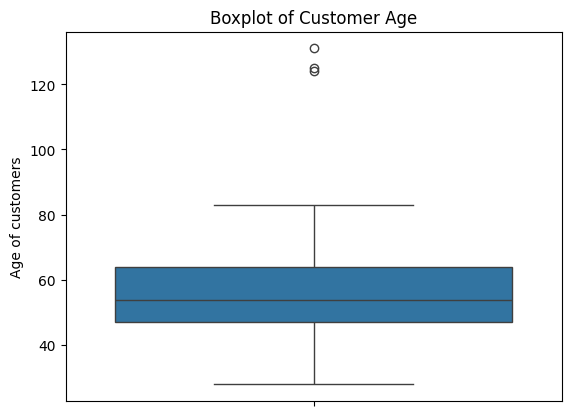

In [15]:
sns.boxplot(y=data['Age'])
plt.ylabel('Age of customers')
plt.title('Boxplot of Customer Age')
plt.savefig('Age_Boxplot.png')
plt.show()

In [16]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(data['Age'], 25)
Q3 = np.percentile(data['Age'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]

# Filter out the outliers
filtered_data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

print("Outliers:")
print(outliers)
print("\nFiltered Data:")
print(filtered_data)

Outliers:
        ID Education Marital_Status      Income  Kidhome  Teenhome  \
192   7829        D3          Cerai  36640000.0        1         0   
239  11004        D3         Lajang  60182000.0        0         1   
339   1150        S3    Bertunangan  83532000.0        0         0   

    Dt_Customer  Recency  MntCoke  MntFruits  ...  AcceptedCmp3  AcceptedCmp4  \
192  26-09-2013       99    15000       6000  ...             0             0   
239  17-05-2014       23     8000          0  ...             0             0   
339  26-09-2013       36   755000     144000  ...             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
192             0             0             0         1              3   
239             0             0             0         0              3   
339             1             0             0         0              3   

     Z_Revenue  Response  Age  
192         11         0  124  
239         11         

##### Considering customer Age above 100 as outliers .

In [17]:
#Remove outliers
data = data[data['Age']<100]

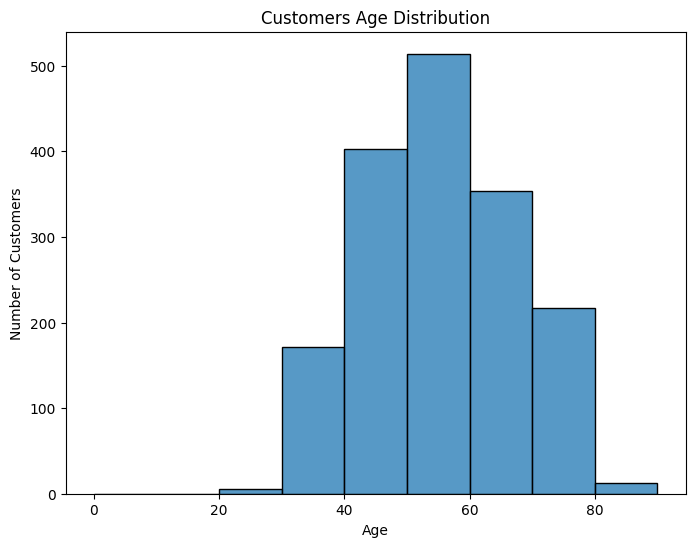

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=np.arange(0, data['Age'].max() + 10, 10), edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Customers Age Distribution')
plt.show()

It is evident from this data that the highest frequency of clients are in their 50s.That is above 500.
Clients in their 40s had the second-highest frequency, followed by those in their 60s.
With roughly 250 clients overall, the distribution of clients in their 30s and 70s is quite similar.
Fewer people in their 20s and even fewer in their 80s represent the customer base.

##### Income

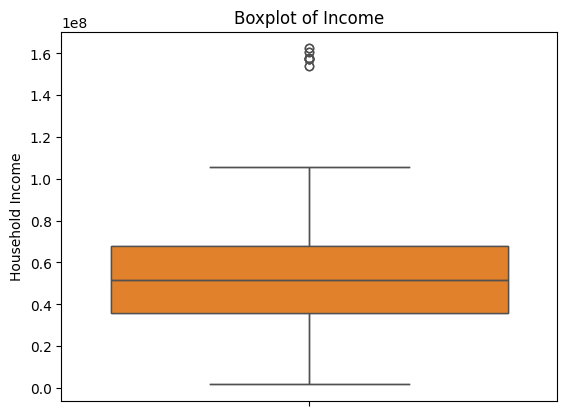

In [19]:
sns.boxplot(data['Income'])
plt.savefig('Income Boxplot.png')

sns.boxplot(y=data['Income'])
plt.ylabel('Household Income')
plt.title('Boxplot of Income')
plt.savefig('Age_Boxplot.png')
plt.show()

#### Filtering Outliers

In [20]:
# Here we consider the coustomers household income above 1.2 as outliers and removing the outliers.
#data = data[data['Income']<1.2] 
data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,...,0,0,0,0,0,0,3,11,1,67
1,2174,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,...,0,0,0,0,0,0,3,11,0,70
2,4141,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,...,0,0,0,0,0,0,3,11,0,59
3,6182,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,...,0,0,0,0,0,0,3,11,0,40
4,5324,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,...,0,0,0,0,0,0,3,11,0,43


###### Column Dt_Customer indicates that the Date of customer's enrollment with the company. we want to convert the format of the  column to datetime format.

In [21]:
# Convert 'Dt_Customer' column to datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
print(data.dtypes)

ID                              int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntCoke                         int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue   

In [22]:
Enrollment = data.set_index(data['Dt_Customer']).resample('MS').size()
Enrollment

Dt_Customer
2012-07-01     2
2012-08-01    88
2012-09-01    71
2012-10-01    66
2012-11-01    75
2012-12-01    67
2013-01-01    81
2013-02-01    67
2013-03-01    72
2013-04-01    74
2013-05-01    82
2013-06-01    68
2013-07-01    76
2013-08-01    79
2013-09-01    66
2013-10-01    88
2013-11-01    69
2013-12-01    76
2014-01-01    62
2014-02-01    61
2014-03-01    79
2014-04-01    68
2014-05-01    88
2014-06-01    52
Freq: MS, dtype: int64

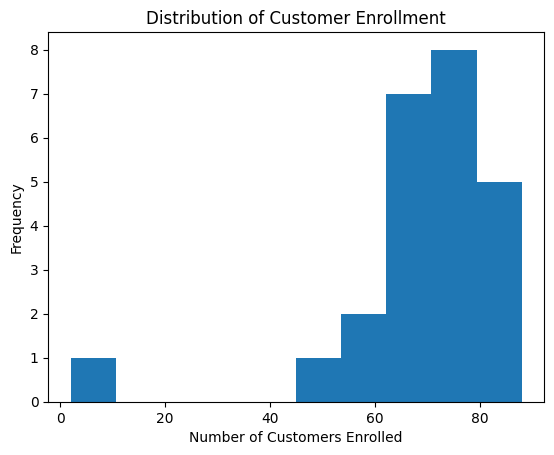

In [23]:
plt.hist(Enrollment)
plt.xlabel('Number of Customers Enrolled')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Enrollment')
plt.savefig('Distribution of Customer Enrollment.png') 
plt.show() 

### Feature Engineering

As 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', and 'Response' all indicate the customer's choice to purchase or not during promotional campaigns, we are combining the six columns into one.
The "CmpAccepted" column is the new one.

In [24]:
data['CmpAccepted'] = np.where((data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] +
                              data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']) > 0, 1, 0)

data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,CmpAccepted
0,5524,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,88000,...,0,0,0,0,0,3,11,1,67,1
1,2174,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,...,0,0,0,0,0,3,11,0,70,0
2,4141,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,...,0,0,0,0,0,3,11,0,59,0
3,6182,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,...,0,0,0,0,0,3,11,0,40,0
4,5324,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,...,0,0,0,0,0,3,11,0,43,0


In [25]:
data['CmpAccepted'].value_counts()

CmpAccepted
0    1236
1     441
Name: count, dtype: int64

According to the results, following six promotion campaigns, 442 customers bought the products, whereas 1238 did not.

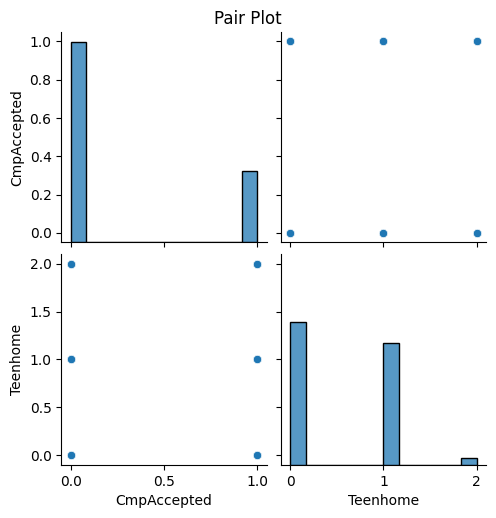

In [26]:
#We are going to investigate whether or not there is a correlation between the company's promotional campaigns and the youngsters living in the household. 
sns.pairplot(data[['CmpAccepted', 'Teenhome']])
plt.suptitle('Pair Plot', y=1.02)
plt.show()

The distribution of CmpAccepted shows a heavy skew towards 0, with very few individuals accepting campaigns regardless of the number of teenagers at home. Accordingly, it can be observed that the acceptance of company promotional activities was not influenced by teenagers in the home.

##### Marital status

In [27]:
data['Marital_Status'].unique() 

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

This indicates that the marital status column has around six distinct categories. In order to create two unique statuses—"Single" and "In a relationship"—it is necessary to convert the six distinct status. Ad, they employ terms from the native language, such as Lajang, which means single, Bertunangan, which means engaged, Menikah, which means married, Cerai, which means divorced, Janda, which means widow, and Duda, which means widower, to denote marital status(male)

In [28]:
data.loc[data['Marital_Status'] == 'Bertunangan', 'Marital_Status'] = 'In a Relationship'
data.loc[data['Marital_Status'] == 'Menikah', 'Marital_Status'] = 'In a Relationship'
data.loc[data['Marital_Status'] == 'Lajang', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Cerai', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Janda', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Duda', 'Marital_Status'] = 'Single'

data['Marital_Status'].value_counts() 

Marital_Status
In a Relationship    1087
Single                590
Name: count, dtype: int64

We can now see how many customers are single and how many are in a relationship. It is clear that 1088 individuals are in a relationship and 592 are single.

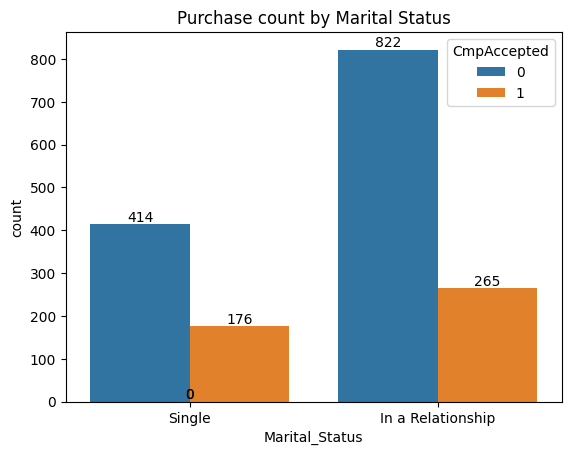

<Figure size 640x480 with 0 Axes>

In [29]:
ax = sns.countplot(x='Marital_Status', hue='CmpAccepted', data=data)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.title('Purchase count by Marital Status')
plt.show()
plt.savefig('Purchase count by Marital Status.png')

In conclusion, while more individuals in a relationship make purchases, single individuals seem slightly more responsive to the marketing campaign based on the proportion of accepted offers. The acceptance rate for the marketing campaign appears to be higher among singles compared to those in a relationship.

##### Label Encoding

 Using label encoding, we have to convert categorical data into numerical data in the columns "marital status" and "education."

In [30]:
data['Education'].unique()

array(['S1', 'S3', 'S2', 'SMA', 'D3'], dtype=object)

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode 'Education' column
data['Education'] = label_encoder.fit_transform(data['Education'])
education_labels = label_encoder.classes_

print("Mapping for 'Education':")
for label, encoded_value in enumerate(education_labels):
    print(f"The numerical value {label} corresponds to: {encoded_value}")

print("\n")

# Encode 'Marital_Status' column
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])
marital_status_labels = label_encoder.classes_

print("Mapping for 'Marital_Status':")
for label, encoded_value in enumerate(marital_status_labels):
    print(f"The numerical value {label} corresponds to: {encoded_value}")

Mapping for 'Education':
The numerical value 0 corresponds to: D3
The numerical value 1 corresponds to: S1
The numerical value 2 corresponds to: S2
The numerical value 3 corresponds to: S3
The numerical value 4 corresponds to: SMA


Mapping for 'Marital_Status':
The numerical value 0 corresponds to: In a Relationship
The numerical value 1 corresponds to: Single


In [32]:
data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,CmpAccepted
0,5524,1,1,58138000.0,0,0,2012-09-04,58,635000,88000,...,0,0,0,0,0,3,11,1,67,1
1,2174,1,1,46344000.0,1,1,2014-03-08,38,11000,1000,...,0,0,0,0,0,3,11,0,70,0
2,4141,1,0,71613000.0,0,0,2013-08-21,26,426000,49000,...,0,0,0,0,0,3,11,0,59,0
3,6182,1,0,26646000.0,1,0,2014-02-10,26,11000,4000,...,0,0,0,0,0,3,11,0,40,0
4,5324,3,0,58293000.0,1,0,2014-01-19,94,173000,43000,...,0,0,0,0,0,3,11,0,43,0


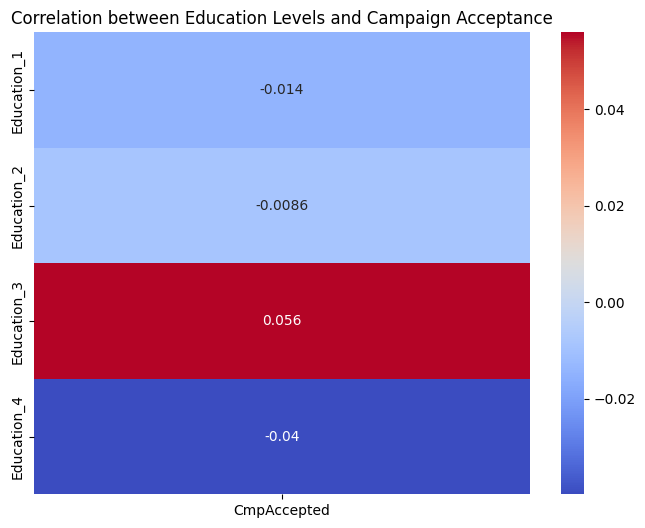

In [33]:
data_encoded = pd.get_dummies(data, columns=['Education'], drop_first=True)
correlation = data_encoded.corr()

education_correlation = correlation[['CmpAccepted']].loc[data_encoded.columns.str.contains('Education')]
plt.figure(figsize=(8, 6))
sns.heatmap(education_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Education Levels and Campaign Acceptance')
plt.show()

This correlation analysis says that customer's education level is not a major predictor of whether theywill accept the promotional campaigns.

##### Evaluating which purchasing method customers prefer

In [34]:
# Calculate total purchases for each mode
total_purchases = {'Web Purchases': data['NumWebPurchases'].sum(),'Catalog Purchases': data['NumCatalogPurchases'].sum(),'Store Purchases': data['NumStorePurchases'].sum(),'Web Visits': data['NumWebVisitsMonth'].sum()}

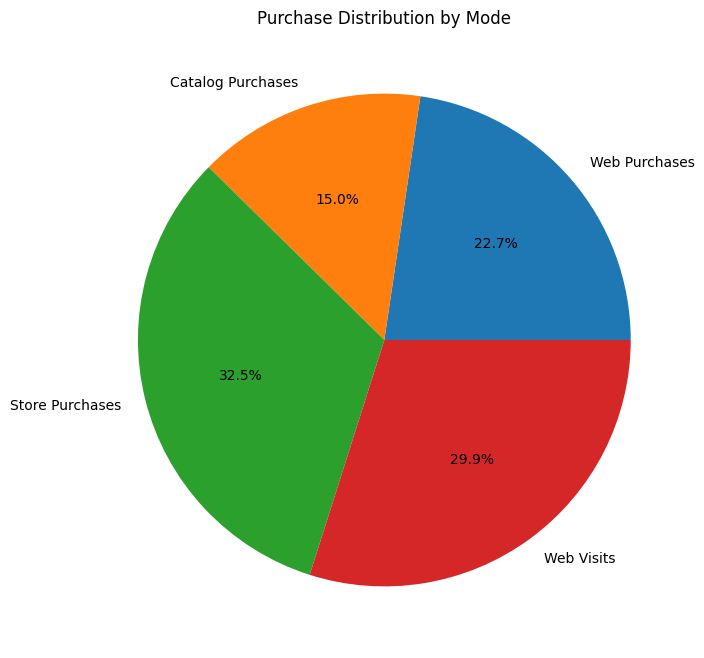

In [35]:
plt.figure(figsize=(8, 8))
plt.pie(total_purchases.values(), labels=total_purchases.keys(), autopct='%1.1f%%')
plt.title('Purchase Distribution by Mode')
plt.show()

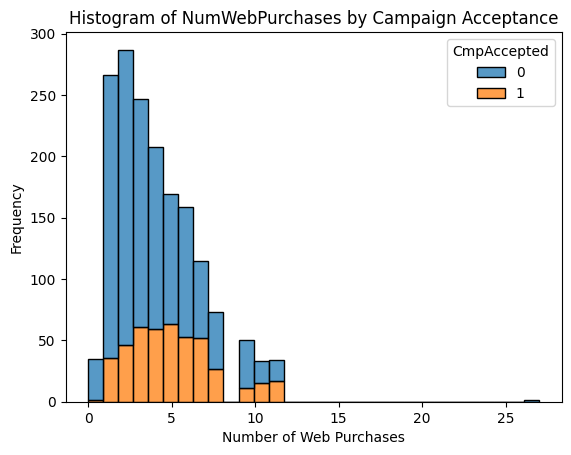

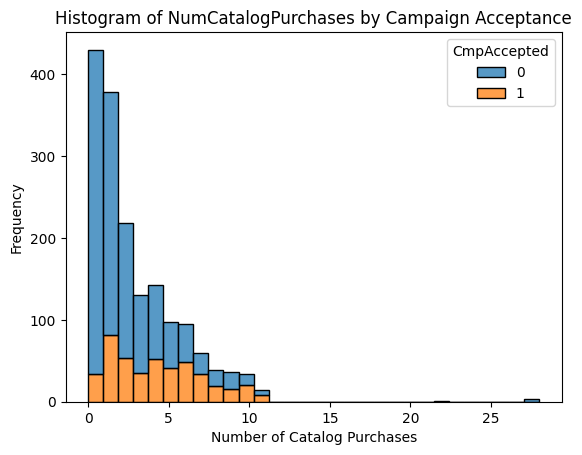

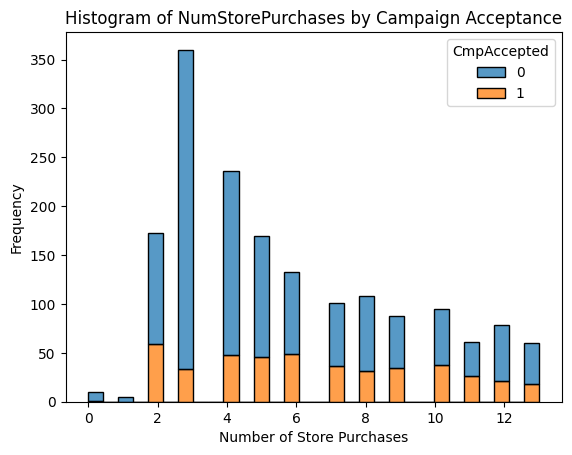

In [36]:
# Histogram for NumWebPurchases
sns.histplot(data=data, x='NumWebPurchases', hue='CmpAccepted', multiple='stack', bins=30)
plt.title('Histogram of NumWebPurchases by Campaign Acceptance')
plt.xlabel('Number of Web Purchases')
plt.ylabel('Frequency')
plt.show()

# Histogram for NumCatalogPurchases
sns.histplot(data=data, x='NumCatalogPurchases', hue='CmpAccepted', multiple='stack', bins=30)
plt.title('Histogram of NumCatalogPurchases by Campaign Acceptance')
plt.xlabel('Number of Catalog Purchases')
plt.ylabel('Frequency')
plt.show()

# Histogram for NumStorePurchases
sns.histplot(data=data, x='NumStorePurchases', hue='CmpAccepted', multiple='stack', bins=30)
plt.title('Histogram of NumStorePurchases by Campaign Acceptance')
plt.xlabel('Number of Store Purchases')
plt.ylabel('Frequency')
plt.show()

It is clear that in-store purchases are the most popular among consumersthat is 32.5%, with web visits coming in second with 29.9%. And the least popular purchase is a catalog.

#### Correlation heatmap

We will visualize the correlation heatmap in order to determine the correlation between the variables in this dataset.

In [37]:
data = data.drop('AcceptedCmp1', axis=1)
data = data.drop('AcceptedCmp2', axis=1)
data = data.drop('AcceptedCmp3', axis=1)
data = data.drop('AcceptedCmp4', axis=1)
data = data.drop('AcceptedCmp5', axis=1)
data = data.drop('Response', axis=1)

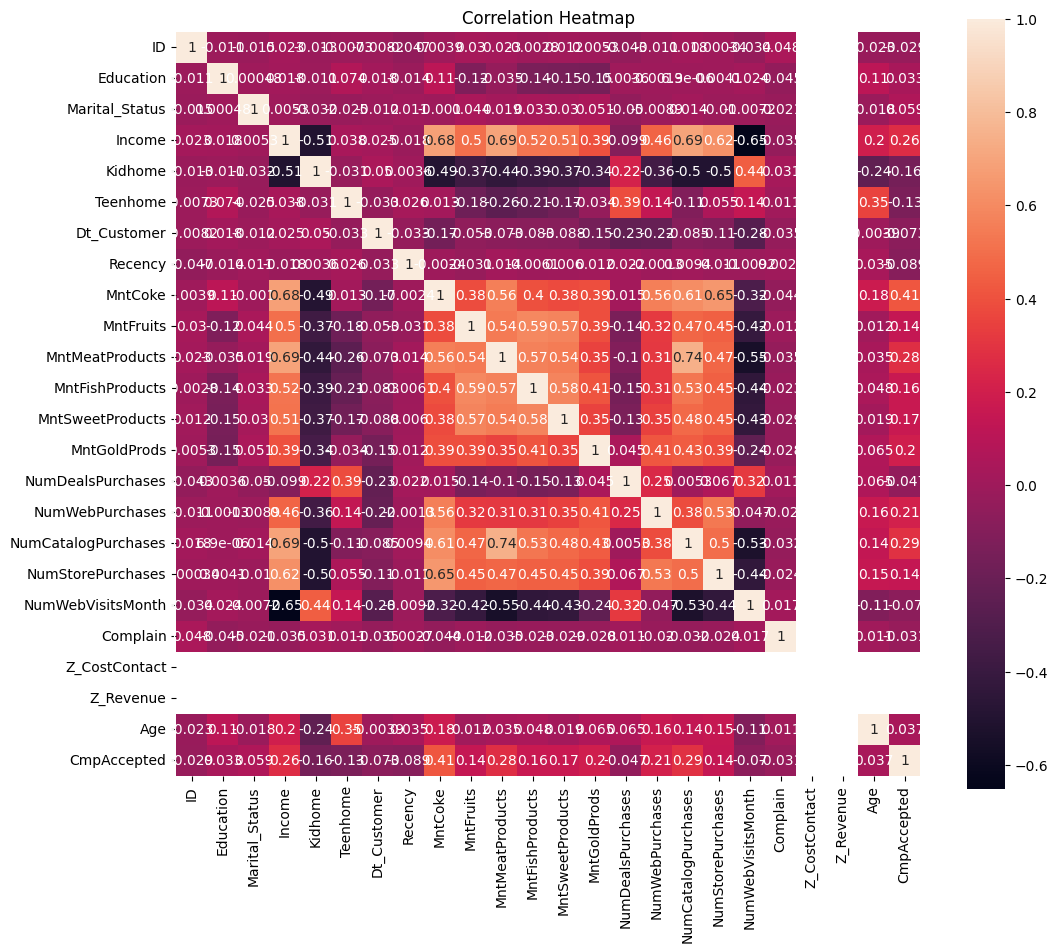

In [38]:
ax = plt.subplots( figsize =( 12 , 10 ) )
foo = sns.heatmap(data.corr(), vmax=1.0, square=True, annot=True)
plt.title('Correlation Heatmap')
plt.savefig('Correlation heatmap.png')

#### Feature Scaling And Dimensionality Reduction

In [39]:
data['Total_Spending'] = data['MntCoke']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
#We want to combine the columns listed above for computational convenienc. And drop some colums.

In [40]:
data.drop(['ID', 'Z_CostContact', 'Z_Revenue', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)

In [41]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Age', 'CmpAccepted', 'Total_Spending'],
      dtype='object')

##### Dropping irrelevant columns from the data and Performing feature scaling on numerical columns 'Age' and 'Income'

In [42]:
segment = data.drop(['Education', 'Marital_Status', 'Dt_Customer', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain','Teenhome', 'Kidhome'], axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(segment)

scaler = StandardScaler()
data[['Age', 'Income']] = scaler.fit_transform(data[['Age', 'Income']])


In [43]:
# Apply PCA
pca = PCA(n_components=2)  # Number of principal components you want to keep
principal_components = pca.fit_transform(segment)

principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Output the principal components
print("\nPrincipal Components:")
print(principal_df)


Principal Components:
      Principal Component 1  Principal Component 2
0              6.159192e+06         -876241.607013
1             -5.667289e+06          450742.465640
2              1.961212e+07          264603.051310
3             -2.535983e+07          -13874.286978
4              6.287544e+06          321913.540160
...                     ...                    ...
1672          -3.181058e+07         -186558.613598
1673          -2.442880e+07         -184185.051059
1674          -3.614153e+07         -237010.118561
1675          -2.459687e+06          145091.615086
1676          -1.877906e+07          114694.187564

[1677 rows x 2 columns]


####  Plotting the principal components:

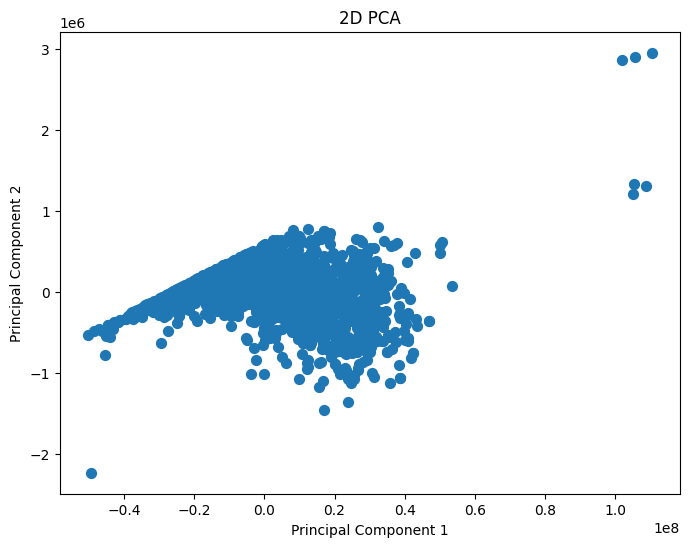

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], s=50)
plt.title('2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [45]:
segment.head(3)

,Income,Recency,NumDealsPurchases,Age,CmpAccepted,Total_Spending
0,58138000.0,58,3,67,1,1617000
1,46344000.0,38,2,70,0,27000
2,71613000.0,26,1,59,0,776000


In [46]:
# Explained variance and explained variance ratio
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# Output the explained variance and explained variance ratio
print("\nExplained Variance:")
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance}")

print("\nExplained Variance Ratio:")
for i, variance_ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {variance_ratio * 100:.2f}%")


Explained Variance:
Principal Component 1: 457094706377841.6
Principal Component 2: 134808791324.3061

Explained Variance Ratio:
Principal Component 1: 99.97%
Principal Component 2: 0.03%


#### Concatenate the principal components with original data for reference

In [47]:
final_df = pd.concat([data, principal_df], axis=1)
print(final_df)

      Education  Marital_Status    Income  Kidhome  Teenhome Dt_Customer  \
0           1.0             1.0  0.287258      0.0       0.0  2012-09-04   
1           1.0             1.0 -0.264686      1.0       1.0  2014-03-08   
2           1.0             0.0  0.917871      0.0       0.0  2013-08-21   
3           1.0             0.0 -1.186528      1.0       0.0  2014-02-10   
4           3.0             0.0  0.294512      1.0       0.0  2014-01-19   
...         ...             ...       ...      ...       ...         ...   
1678        3.0             0.0 -0.114931      1.0       0.0  2013-02-12   
1679        1.0             0.0 -0.878499      1.0       0.0  2014-01-23   
192         NaN             NaN       NaN      NaN       NaN         NaT   
239         NaN             NaN       NaN      NaN       NaN         NaT   
339         NaN             NaN       NaN      NaN       NaN         NaT   

      Recency  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0        58.0

In [48]:
kmeans = KMeans()
kmeans.fit(scaled_features)

KMeans()

In [49]:
cluster_range = range(2, 21)

kmeans_models = [KMeans(n_clusters=i, init='random').fit(scaled_features) for i in cluster_range]
inertia_range = [model.inertia_ for model in kmeans_models]
silhouette_range = [silhouette_score(scaled_features, model.labels_) for model in kmeans_models]

<function matplotlib.pyplot.show(close=None, block=None)>

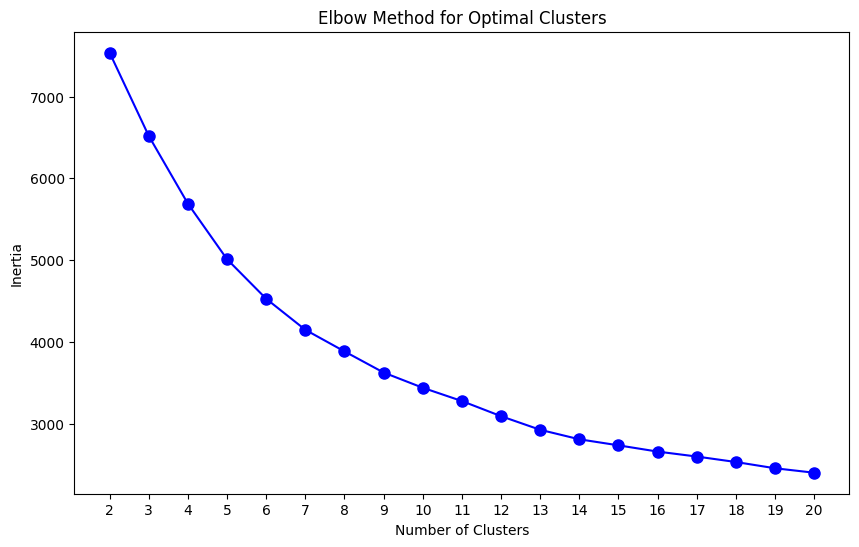

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_range, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)  # Ensure all cluster numbers are shown on x-axis
plt.show

In [51]:
print("Cluster_range")
print(list(cluster_range))
print()
print("Inertia_range")
print(list(inertia_range))
print()
print("Silhouette_range")
print(list(silhouette_range))

Cluster_range
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Inertia_range
[7535.900791553245, 6517.951281364763, 5689.029714501426, 5009.37887112846, 4525.888676757553, 4146.229255129064, 3882.1127624968076, 3623.495672883336, 3437.3792615308776, 3274.777402162037, 3089.6032233628307, 2923.1470924329383, 2806.9579711829942, 2732.956521155504, 2656.5789977690974, 2595.963752432669, 2528.924997913644, 2452.584004497457, 2398.0138914959225]

Silhouette_range
[0.25749719039124475, 0.24001269886229296, 0.23582712750033608, 0.21819118817133254, 0.2306117431104858, 0.22700002975973918, 0.22581427173467003, 0.22318193304146272, 0.2207018419993324, 0.22015211061759035, 0.2261451402797115, 0.23216440636480165, 0.23231178444134104, 0.23222022066649306, 0.21634677023437765, 0.21451287007621916, 0.21170664067563352, 0.21404768047023773, 0.2084782513412572]


##### Perform PCA on the scaled features and visualize

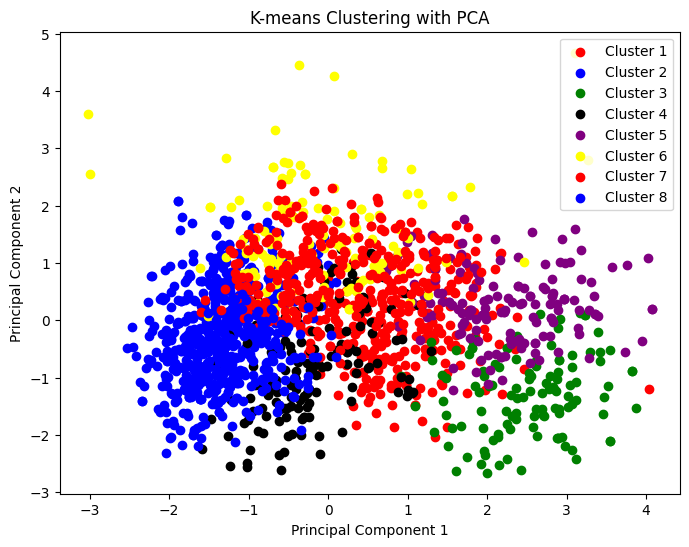

In [52]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)

# Plot the scatter plot of the clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'black', 'purple', 'yellow'] 

for i in range(len(np.unique(kmeans.labels_))):
    plt.scatter(pca_data[kmeans.labels_ == i, 0], pca_data[kmeans.labels_ == i, 1], c=colors[i % len(colors)], label=f'Cluster {i+1}')

plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('KMeans_Clustering_with_PCA.png')
plt.show()

### Training and Testing 

In [53]:
cols = ['Dt_Customer', 'CmpAccepted']
X = data.drop(cols, axis=1)
y = data['CmpAccepted'].copy()
y.head(3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

total_sample_size = data.shape[0]
feature_training_sample_size = X_train.shape[0]
target_training_sample_size = y_train.shape[0]
feature_testing_sample_size = X_test.shape[0]
target_testing_sample_size = y_test.shape[0]

print(f"Total sample size = {total_sample_size};\n"
      f"Feature training sample size = {feature_training_sample_size},\n"
      f"Target training sample size = {target_training_sample_size},\n"
      f"Feature testing sample size = {feature_testing_sample_size},\n"
      f"Target testing sample size = {target_testing_sample_size}")

Total sample size = 1677;
Feature training sample size = 1341,
Target training sample size = 1341,
Feature testing sample size = 336,
Target testing sample size = 336


In [54]:
# Create a KNN classifier with 10 neighbors and distance-based weighting
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')

# Fit the model using the training data
knn_model = knn.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = knn.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1 Score: 0.76


### Logistic Regression

In [55]:
# Create a Logistic Regression classifier
lgr = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence

# Fit the model using the training data
lgr_model = lgr.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = lgr.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.79
Precision: 0.77
Recall: 0.79
F1 Score: 0.77


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Visualizes the performance of the classifier using a heatmap

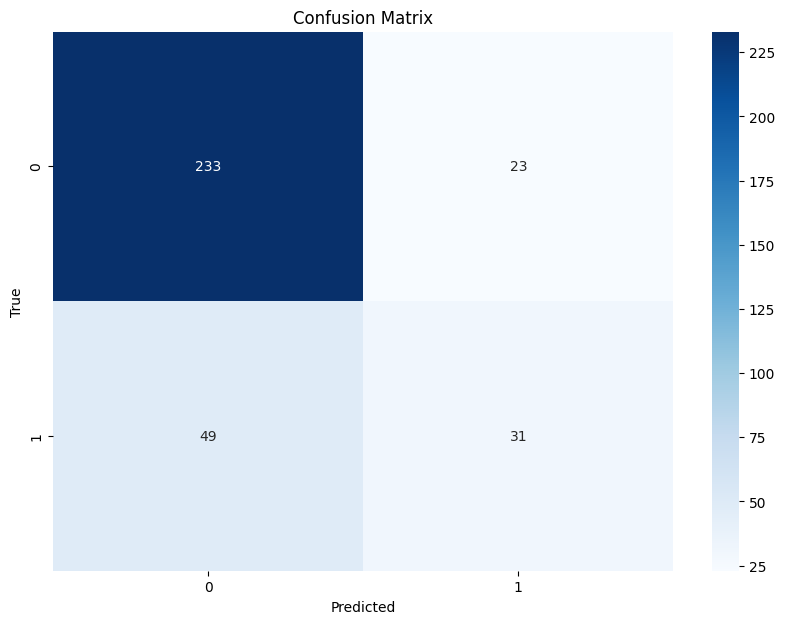

In [56]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=lgr.classes_, yticklabels=lgr.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Random Forest Classifier

Accuracy: 0.82
Precision: 0.81
Recall: 0.82
F1 Score: 0.81


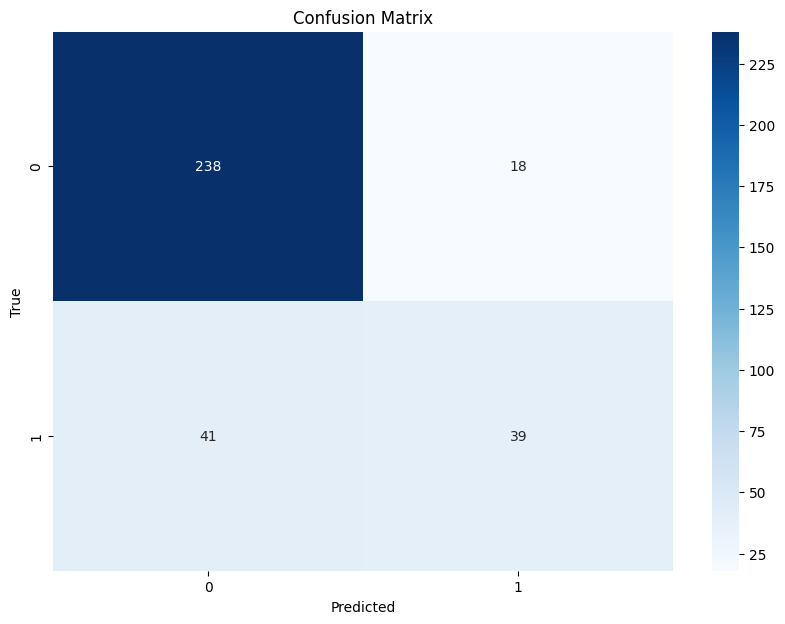

In [57]:
# Create and fit the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters
rf_model = rf_classifier.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#### Bagging

Accuracy: 0.80
Precision: 0.79
Recall: 0.80
F1 Score: 0.79


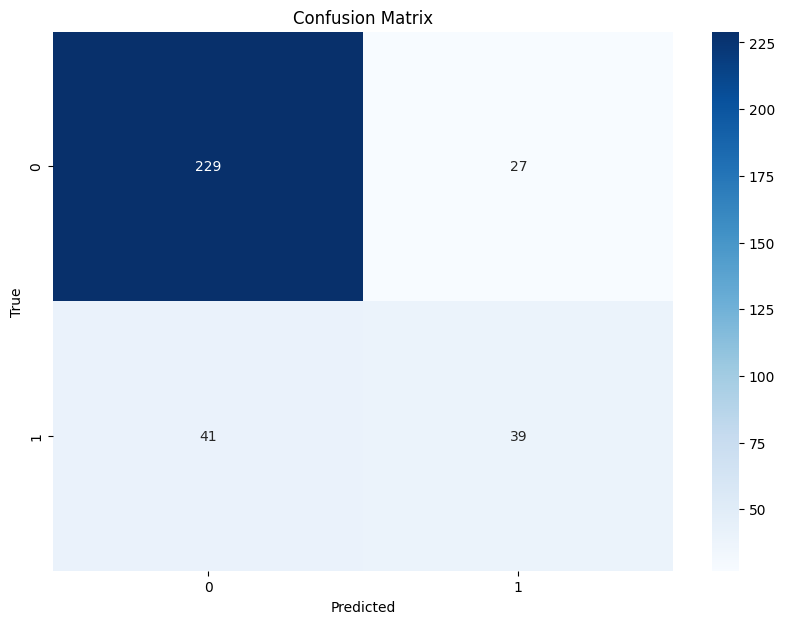

In [58]:
# Create a Bagging classifier with KNN as the base estimator
bagging = BaggingClassifier(
    KNeighborsClassifier(n_neighbors=2, weights='distance'),
    oob_score=True,
    max_samples=0.5,
    max_features=1.0
)

# Fit the model using the training data
bag_model = bagging.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = bag_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=bagging.classes_, yticklabels=bagging.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Gradient Boosting

Accuracy: 0.79
Precision: 0.79
Recall: 0.79
F1 Score: 0.79


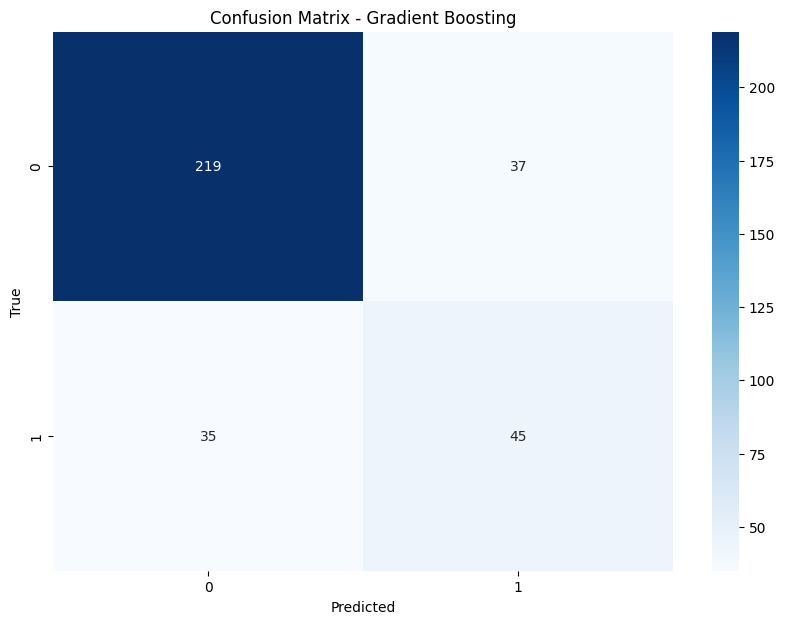

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Create a Gradient Boosting classifier with specified hyperparameters
gb = GradientBoostingClassifier(loss='exponential',
    n_estimators=1000,
    learning_rate=0.5,
    max_depth=3,
    subsample=0.5,
    random_state=15)

# Fit the model using the training data
gb_model = gb.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = gb_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

#Confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('Confusion_Matrix_Gradient_Boosting.png')
plt.show()

##### Extreme Gradient Boosting

In [66]:
pip install xgboost

                                              0.0/124.9 MB ? eta -:--:--
                                              0.1/124.9 MB 1.7 MB/s eta 0:01:16
                                              0.1/124.9 MB 1.1 MB/s eta 0:01:59
                                              0.1/124.9 MB 1.0 MB/s eta 0:02:01
                                            0.2/124.9 MB 893.0 kB/s eta 0:02:20
                                            0.2/124.9 MB 888.4 kB/s eta 0:02:21
                                              0.3/124.9 MB 1.1 MB/s eta 0:01:58
                                              0.4/124.9 MB 1.2 MB/s eta 0:01:48
                                              0.5/124.9 MB 1.2 MB/s eta 0:01:46
                                              0.5/124.9 MB 1.2 MB/s eta 0:01:43
                                              0.6/124.9 MB 1.3 MB/s eta 0:01:35
                                              0.7/124.9 MB 1.3 MB/s eta 0:01:35
                                              0


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Declare parameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'alpha': 10,
    'learning_rate': 1.0,
    'n_estimators': 500
}

# Instantiate the classifier
xgb = XGBClassifier(**params)

# Fit the classifier to the training data
xgb.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = xgb.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.82
Precision: 0.70
Recall: 0.56
F1 Score: 0.62


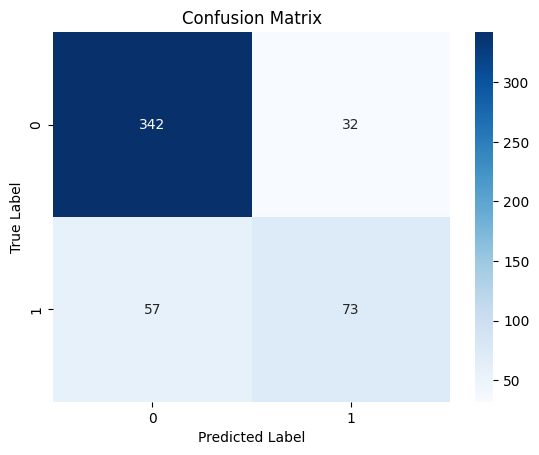

In [68]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Summary of Model Performance:


##### K-Nearest Neighbors (KNN):

Accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1 Score: 0.76
KNN shows consistent but moderate performance across all metrics, indicating balanced but not optimal classification.

##### Logistic Regression:

Accuracy: 0.79
Precision: 0.77
Recall: 0.79
F1 Score: 0.77
Logistic Regression performs slightly better than KNN, particularly in recall, making it a good option for balanced classes.

##### Random Forest Classifier:

Accuracy: 0.82
Precision: 0.81
Recall: 0.82
F1 Score: 0.81
The Random Forest model outperforms the other models in terms of accuracy, precision, recall, and F1 score, suggesting that it captures more of the underlying patterns in the data.


##### Bagging:

Accuracy: 0.80
Precision: 0.79
Recall: 0.80
F1 Score: 0.79
Bagging performs similarly to Gradient Boosting, with slightly better accuracy and precision, making it a strong, consistent performer.


##### Gradient Boosting:

Accuracy: 0.79
Precision: 0.79
Recall: 0.79
F1 Score: 0.79
Gradient Boosting offers good performance but is outpaced by Random Forest, particularly in recall and overall accuracy.


##### Extreme Gradient Boosting (XGBoost):

Accuracy: 0.82
Precision: 0.70
Recall: 0.56
F1 Score: 0.62
While XGBoost achieves the highest accuracy, its lower precision and recall, along with an imbalanced F1 score, suggest potential issues with handling the minority class or overfitting to the training data.


## Conclusion:


With the highest scores in accuracy, precision, recall, and F1, the Random Forest Classifier is the top performer overall. This means that it successfully finds a balance between overfitting and underfitting, helping it to identify the most significant patterns in the data. In conclusion, because Random Forest performs well on all measures, it is advised to use it as the main model. 
